<H3 align = "right">Spring 2025 Computer Project 02</H3>

## Group Number: `16`
 

## Names of Student in Group:
- Name: `Flora Zhong`
- Name: `Yiwen Chen`
- Name: `Aseel Ismail`


In [ ]:
# You shouldn't need anything beyond these imports.  If you feel you do, talk to me.
# You will need to import these inside of the respective py files.
import numpy as np

---
## General Instructions
As in the previous project, you should set up a public GitHub repository for this project.  When you submit your project you will submit an archive (zip) of your repository.  In addition, you should edit this file to include a link to your repository.  The usual guidelines apply.
* Use docstrings/in-line comments to explain what the code does.  Please reserve in-line comments for things that are non-obvious.
* Use best practices for code style (such as descriptive variable names)
* Document any third-party sources used (or risk getting a 0)

Link to GitHub repository: ***https://github.com/Flora-Zhong/P2G16***

---  
# The Mandelbrot Set
All of your code will live in a file `mandelbrot.py` in your GitHub repository.
The Mandelbrot set is a famous fractal which lives in the complex plane.  A complex number $c$ is in the Mandelbrot set if and only if the sequence $z_n$ defined below does not tend toward infinity.

$\begin{align*}
z_0 &= c \\
z_1 &= z_0^2+c \\
z_2 &= z_1^2+c \\
&\cdots \\
z_{n+1} &= z_n^2+c \\
&\cdots
\end{align*}$

When plotting a complex number $a+bi$ we regard $a$ as the x-coordinate and $b$ as the y-coordinate.



## Part1: Escape Time (One Complex Number) (5 points)
The moment a complex number, say $z_k$ from the above sequence, has a magnitude greater than 2, the sequence is guaranteed to tend toward infinity.  Therefore, the first $k$ for which $|z_k|>2$ is called the *escape time* of $c$. In `mandelbrot.py` implement a function with the following signature:

```python
def get_escape_time(c: complex, max_iterations: int) -> int | None:
    ...
```
The function will return the number of iterations which pass before $c$ escapes.
* If $c$ does not escape in the specified number of iterations, then `None` is returned.
* Otherwise, a number in `range(max_iterations)` will be returned which tells how many iterations passed before the point escaped.

### Sample Output
* `get_escape_time(2+1j, 5)` returns `0`  (This already has magnitude exceeding 2)
* `get_escape_time(1+1j, 10)` returns `1`
* `get_escape_time(0.5+0.5j, 2)` returns `None`
* `get_escape_time(0.5+0.5j, 2)` returns `4`
* `get_escape_time(0.38+0.25j, 100)` returns `56`

#### Testing Code

In [15]:
from mandelbrot import get_escape_time
print(get_escape_time(2+1j, 5))
print(get_escape_time(1+1j, 10))
print(get_escape_time(0.5+0.5j, 3))
print(get_escape_time(0.5+0.5j, 4))
print(get_escape_time(0.38+0.25j, 100))

0
1
None
4
56


## Part 2: Defining a Grid (10 points)
To draw a simple image of the Mandelbrot set, we need to compute a grid of complex numbers, one for each pixel of our image.  In `mandelbrot.py` write a function called `get_complex_grid` with the signature:

```python
def get_complex_grid(
    top_left: complex,
    bottom_right: complex,
    step: float
) -> np.ndarray:
    ...
```

This function will return an array whose contents will be complex numbers evenly spaced between `top_left` and (but not including) `bottom_right`.
* At index `[0, 0]` the value `top_left` will be stored.
* Increasing the row by 1 will decrease the imaginary party by `step`.
* Increasing the column by 1 will increase the real part by `step`
* This is sort of a complex version of `np.arange()`

### Implementation Notes
* You are not supposed to use loops to implement this, only NumPy array operations.  If you can't figure out how to do it with NumPy operations, some points will be deducted.

#### Testing

In [1]:
import mandelbrot

# The below should print
# [[-1.+1.j  0.+1.j  1.+1.j]
#  [-1.+0.j  0.+0.j  1.+0.j]
#  [-1.-1.j  0.-1.j  1.-1.j]]

print(mandelbrot.get_complex_grid(-1+1j, 1.1-1.1j, 1))

[[-1.+1.j  0.+1.j  1.+1.j]
 [-1.+0.j  0.+0.j  1.+0.j]
 [-1.-1.j  0.-1.j  1.-1.j]]


## Escape Time (The Whole Grid) (10 points)
In order to actually draw the Mandelbrot set, we need to assign a color to each point (pixel) in our grid.  For our purposes we'll use greyscale with black having a value of 0.0 and white having a value of 1.0.  In `mandelbrot.py` write a function `get_escape_time_color_arr()` with the following signature.

```python
def get_escape_time_color_arr(
    c_arr: np.ndarray,
    max_iterations: int
) -> np.ndarray:
    ...
```
This function will take an input of an array of $c$-values.  It will return an array of the same shape with color values in $[0,1]$ according to the escape time of each $c$-value.
* Points that never escape are colored black (value 0.0),
* Points that do escape are colored lighter depending on how fast they escape.  We'll use the formula `(num_iterations-escape_time+1)/(num_iterations+1)`.  Note:
    * Points with 0 escape time are colored white (value 1.0)
    * Points with `num_iterations` (maximum) escape time are colored with `1/(num_iterations+1)`, which is close to 0.0.
    * This means you can treat non-escaping points as though they have escape time `num_iterations+1` if it makes your code simpler.

### Implementation Details
* You are allowed to loop for the iterations, but the arithmetic and escape checking should be done with NumPy operations.
* Your code should not cause warnings from NumPy (e.g. overflow warnings)

### Testing
Running the below cell should produce a decent image of the Mandelbrot set.

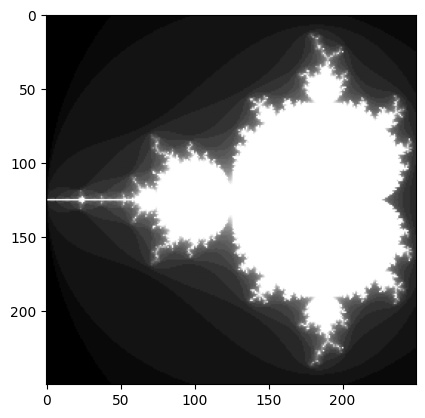

In [1]:
import mandelbrot
from matplotlib import pyplot as plt

grid = mandelbrot.get_complex_grid(-2+1.25j, 0.5-1.25j, 0.01)
colors = mandelbrot.get_escape_time_color_arr(grid, 30)

plt.imshow(colors, cmap="Greys")

## A Julia Set (5 points)
Given a complex number $c$, call $P_c$ the complex polynomial $P_c(z) = z^2 + c$.  Given a point $z$ in the complex plane, the *orbit* of $z$ under the polynomial $P_c$ is the sequence of points
$$\begin{align*}
z_0 &= z \\
z_1 &= P_c(z_0) = z_0^2+c \\
z_2 &= P_c(z_1) = z_1^2+c \\
&\cdots
\end{align*}$$

The *filled Julia set* of $P_c$ is the set of all points whose orbits do not tend toward infinity.  This definition is very similar to that of the Mandelbrot set.  In fact it's identical except for the starting point $z_0$.  As with the Mandelbrot set, there is an escape criterion.  If any point $z_n$ in the orbit has magnitude greater than $\max(|c|, 2)$ then the orbit tends to infinity.  An interesting bit of math here is that the filled Julia set will be connected if $c$ is chosen from within the Mandelbrot set and totally disconnected (a Cantor set) otherwise.

Write a function which collects escape data for the filled in Julia set for a given complex number $c$ and converts it to a color in the same manner as the previous part. Your code should be very similar to the code used to generate the Mandelbrot set.  Hopefully this will be a victory lap of sorts.

### Implementation Details
* You are allowed to loop for the iterations, but the arithmetic and escape checking should be done with NumPy operations.
* Your code should not cause warnings from NumPy (e.g. overflow warnings)



### Testing
Running the below cell should produce a decent image of the Douady Rabbit Julia set (https://en.wikipedia.org/wiki/Douady_rabbit), the Julia set with $c=-0.1226+0.7488i$.  Since this $c$ comes from the Mandelbrot set, the Julia set is connected.

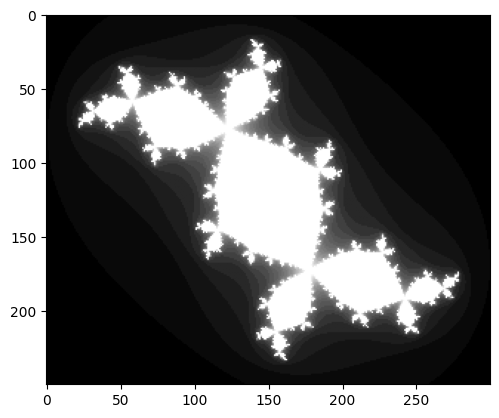

In [1]:
import mandelbrot
from matplotlib import pyplot as plt

rabbit_c = -0.1226 + 0.7499j
grid = mandelbrot.get_complex_grid(-1.5+1.25j, 1.5-1.25j, 0.01)
colors = mandelbrot.get_julia_color_arr(grid, rabbit_c, 30)

plt.imshow(colors, cmap="Greys")